# Testing the bias variance tradeoff

In [1]:
%load_ext autoreload
%autoreload 1

import sys
import os

# This adds 'code/' to sys.path
code_dir = os.path.abspath(os.path.dirname(__file__)) if '__file__' in globals() else os.path.abspath('')
if code_dir not in sys.path:
    sys.path.append(code_dir)

In [2]:
%aimport methods.resampling

from methods.resampling import BiasVariance
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2018)

# Defining the Runge function
def f(x):
    return 1/(1+25*x**2)

n = 300

x = np.random.uniform(-1, 1, n)
y = f(x) + 0.1*np.random.normal(0, 1, n)

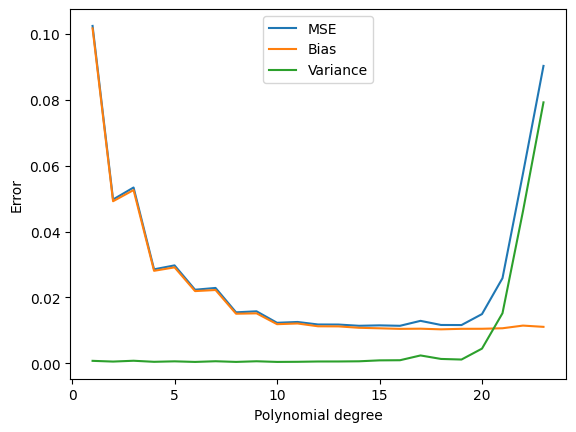

In [3]:
bias_variance_analyzer = BiasVariance(x,y, max_degree=23,n_boostraps = 1000)

bias_variance_analyzer.bootstrap()

bias_variance_analyzer.plot_bias_variance()

In [43]:
from methods.resampling import BiasVariance

n = 350

x = np.random.uniform(-1, 1, n)
y = f(x) + 0.05*np.random.normal(0, 1, n)

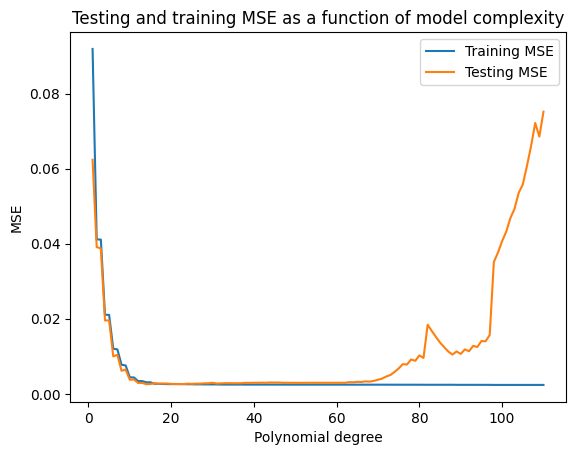

In [50]:
## Figure 2.11 of Hastie et al. 

max_degree = 110

bias_variance_analyzer = BiasVariance(x,y, max_degree=max_degree,n_boostraps = 1)
mse_train = bias_variance_analyzer.no_bootstrap(test_data = False)

bias_variance_analyzer = BiasVariance(x,y, max_degree=max_degree,n_boostraps = 1)
mse_test = bias_variance_analyzer.no_bootstrap(test_data = True)

plt.plot(range(1,max_degree+1), mse_train,label="Training MSE")
plt.plot(range(1,max_degree+1), mse_test,label="Testing MSE")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.legend()
plt.title("Testing and training MSE as a function of model complexity")
plt.show()